In [1]:
import pickle
import random
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as confusionMatrix
from sklearn.metrics import recall_score as recall
from sklearn.metrics import classification_report as classificationReport

%matplotlib inline

# https://www.kaggle.com/crawford/emnist/home

TRAIN_DIR = "C:/Users/Mike/Jupyter/CSVs/lettersAndDigits/emnist-balanced-train.csv"
TEST_DIR = "C:/Users/Mike/Jupyter/CSVs/lettersAndDigits/emnist-balanced-test.csv"

trainingDataSet = pd.read_csv(TRAIN_DIR, dtype=int).values;


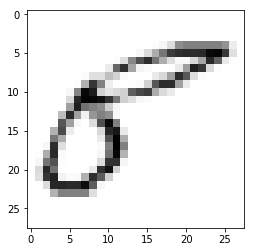

[25]
P


In [2]:
# Cell meant for just viewing the dataset

# The labels in the data represent an index for this mapping string
class_mapping = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt"

# Size is 112798
DATA_SET_LIMIT = 50798

# Create an array holding your training data, excluding index 0 (Your labels)
rawTrainingData = trainingDataSet[:DATA_SET_LIMIT,1:]

# Create an array holding your training labels exclusively
rawTrainingLabels = trainingDataSet[:DATA_SET_LIMIT,0:1]

TrainingData, TestData, TrainingLabels, TestLabels = train_test_split(rawTrainingData,rawTrainingLabels, test_size=0.2, random_state=0)

SELECTED_IMAGE = random.randrange(0,DATA_SET_LIMIT)

# Select the image we want to show
image = rawTrainingData[SELECTED_IMAGE]
label = rawTrainingLabels[SELECTED_IMAGE]

# Convert's the array element into a 28x28 image
image.shape=(28,28)

# Show the image in gray scale using pyplot
# NOTE: 'binary' is like 'gray' cmap but in reverse
plt.imshow(image,cmap='binary')
plt.show()

#Output the label
print(label)

#Pass the label to a string index to get the Actual value
print(class_mapping[label.astype(int)[0]])


In [3]:
# Cell to train the model
DTC = DecisionTreeClassifier()
DTC.fit(TrainingData,TrainingLabels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Predicted Label : 37
Actual Label : b
Index : 8567


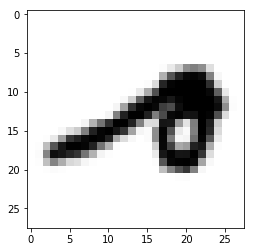

In [4]:
# Select a random image from our test data set
SELECTED_IMAGE = random.randrange(0,10160)

# Select the image we want to show
image = TestData[SELECTED_IMAGE]

# Use reshape(1,-1) to pass in a single element at the correct size
imageModelInput = image.reshape(1,-1)

# NOTE: Need to pass in a 2D array for it to work. A single element from a 2D array won't work. (It'll pass in a 1D array)
predict = DTC.predict(imageModelInput)

# Output what the model things the image is.
print("Predicted Label :",predict[0])
print('Actual Label :',class_mapping[predict[0]])
print('Index :',SELECTED_IMAGE)

# Convert's the array element into a 28x28 image
image.shape=(28,28)

# Show the image in gray scale using pyplot
# NOTE: 'binary' is like 'gray' cmap but in reverse
plt.imshow(image,cmap='binary')
plt.show()

#print(image)

In [5]:
# Plot Confusion Matrix Function

def Plot_Confusion_Matrix(matrix,classes,title,cmap):
    
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    
    plt.title(title)
    plt.colorbar()
    
    numberOfTickMarks = np.arange(len(classes))
    
    plt.xticks(numberOfTickMarks,classes,rotation=45)
    plt.yticks(numberOfTickMarks,classes)
    
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    
    plt.tight_layout()


Recall Score / Model Accuracy : 0.5306102362204724

Classification Report :

              precision    recall  f1-score   support

           0       0.47      0.46      0.47       219
           1       0.49      0.46      0.47       224
           2       0.48      0.51      0.50       210
           3       0.72      0.66      0.69       252
           4       0.51      0.59      0.55       215
           5       0.49      0.49      0.49       201
           6       0.61      0.65      0.63       205
           7       0.80      0.82      0.81       233
           8       0.48      0.45      0.46       220
           9       0.51      0.43      0.46       209
           A       0.54      0.47      0.50       226
           B       0.41      0.38      0.39       199
           C       0.65      0.67      0.66       201
           D       0.55      0.55      0.55       216
           E       0.44      0.52      0.48       221
           F       0.40      0.39      0.39       217
    

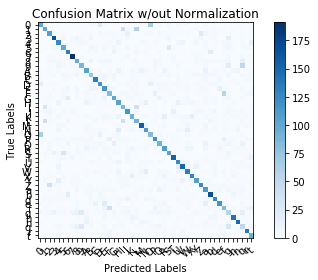

In [9]:
# Cell for testing our model

# Create an object that'll run the model with a given index and return the label it predicted
prediction = DTC.predict(TestData)

# Create Confusion Matrix
# Passing in our true labels and what our model predicted
cm = confusionMatrix(TestLabels,prediction)

# Create an array representing each class
classNames = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','d','e','f','g','h','n','q','r','t']

# Compute the recall ratio ( truePos/(truePos+falseNeg) )
print('Recall Score / Model Accuracy :',recall(TestLabels,prediction,average='micro'))

print('\nClassification Report :\n')

# Output a classification report
print(classificationReport(TestLabels,prediction,target_names=classNames))

# Plot+Display Confusion Matrix
Plot_Confusion_Matrix(cm,classNames,'Confusion Matrix w/out Normalization',plt.cm.Blues)

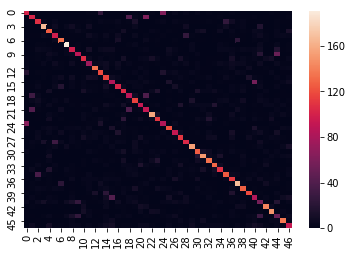

In [8]:
#Confusion matrix heat map using Seaborn
sb.heatmap(cm)